# Simulación de Cadenas de Markov (CM)

In [1]:
rMarkov <- function(P, n = 100, mu0 = rep(1, nrow(P))/nrow(P)) {
    # P: matriz de transicion (sin valor por defecto)
    # n: numero de simulaciones (100 por defecto)
    # mu0: distribucion inicial (uniforme en el espacio de estados por defecto)
    # si el espacio de estados esta en los nombres de las columnas de P, usarlo
    if(length(colnames(P)) == 0) estados <- 1:ncol(P) else estados <- colnames(P)
        
    # funcion de iniciacion
    func.inic <- cumsum(mu0)
        
    # funciones de actualizacion:
    func.act <- t(apply(P, 1, cumsum))
        
    u0 <- eigen(P)$vectors[,which(eigen(P)$values==1)]
        
    U <- runif(n) # uniformes U1,...,Un en [0,1]
        
    X <- numeric(n)*NA # vector de valores simulados de la cadena, a completar
        
    # primer valor de la cadena
    j = 1; while(U[1] > func.inic[j]) j = j + 1;
    X[1] <- estados[j]
        
    # restantes valores de la cadena
    for (i in 2:n) {
        j = 1; while(U[i] > func.act[X[i - 1], j]) j = j + 1;
        X[i] <- estados[j]
    }
        
    X
}

## A) CM Reversible

In [2]:
# sea la matriz de transicion 
P <-matrix(c(.2,.25,.4,0.15,.1,.6,.1,.2,.2,.1,.35,.35,.1,.45,.2,.25),4,4,T)
P

0.2,0.25,0.40,0.15
0.1,0.60,0.10,0.20
0.2,0.10,0.35,0.35
0.1,0.45,0.20,0.25


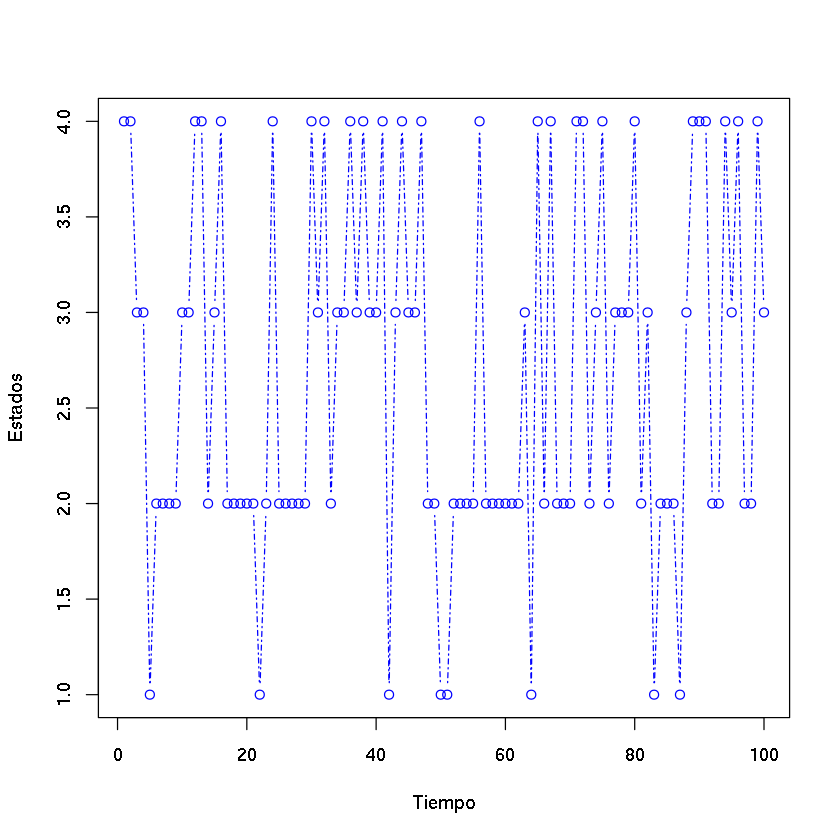

In [3]:
X <- rMarkov(P,100)
plot(1:100, X[1:100],type= 'b',col = 'blue',lwd = 1,las =.2, ylab= 'Estados',xlab='Tiempo',lty=10)

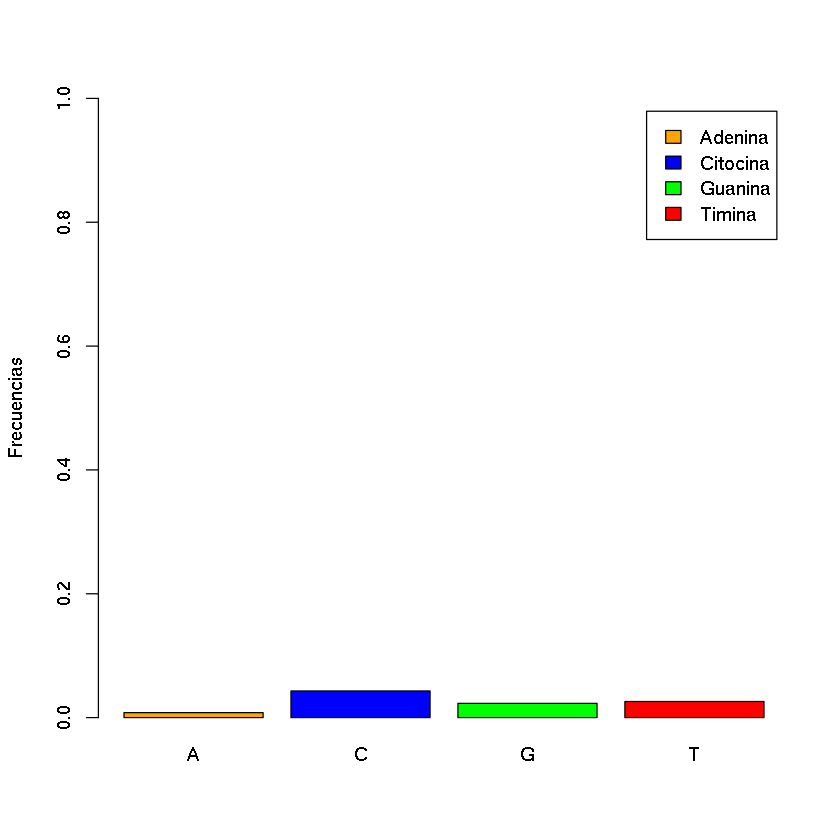

In [4]:
X[X==1]='A'
X[X==2]='C'
X[X==3]='G'
X[X==4]='T'

barplot(table(X)/1000,col=c("orange","blue","green","red"),ylim=c(0,1),ylab = "Frecuencias",
        legend.text = c("Adenina","Citocina","Guanina","Timina"))

### Segundo Ejemplo

In [5]:
# sea la matriz de transicion 
P <-matrix(c(.5,.5,0,0,1/3,2/3,1/3,1/3,1/3),3,3,T)
P

0.5000000,0.5000000,0.0000000
0.0000000,0.3333333,0.6666667
0.3333333,0.3333333,0.3333333


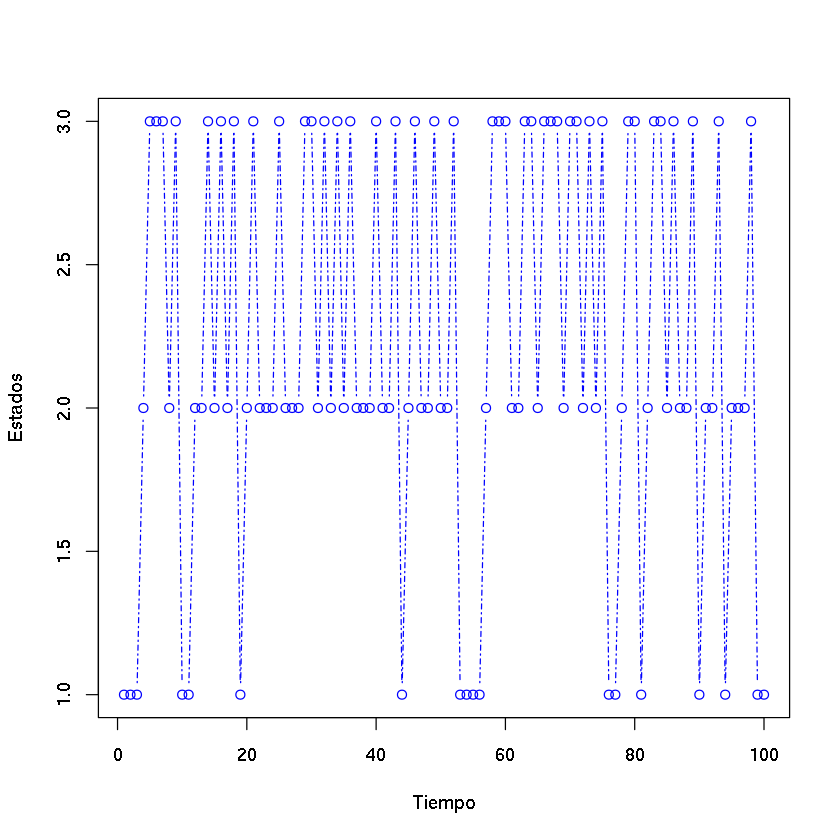

In [6]:
X <- rMarkov(P,1000)
plot(1:100, X[1:100],type= 'b',col = 'blue',lwd = 1,las =.2, ylab = 'Estados',xlab ='Tiempo',lty=10)

### Tercer ejemplo

In [7]:
P <- matrix(c(.25,.75,0,.5,0,.5,0,.25,.75),3,3,T)
P

0.25,0.75,0.00
0.50,0.00,0.50
0.00,0.25,0.75


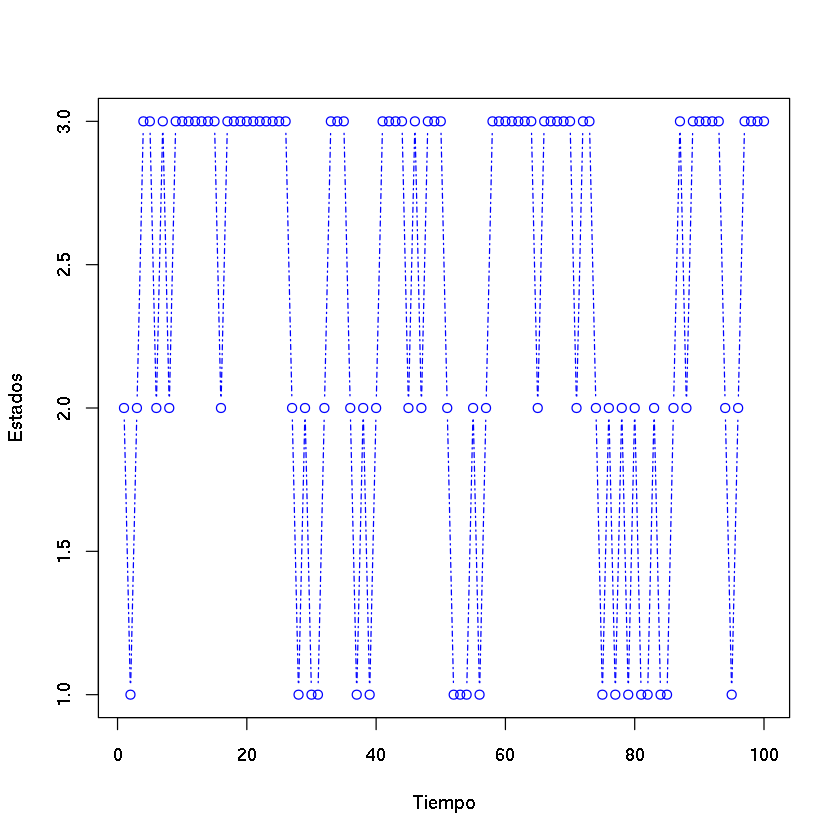

In [8]:
X <- rMarkov(P,1000)
plot(1:100, X[1:100],type= 'b',col = 'blue',lwd = 1,las =.2, ylab = 'Estados',xlab ='Tiempo',lty=10)

## B) Distribuiones Estacionarias

In [9]:
# Sea la matriz de transicion
P <- matrix(c(.7,.2,.1,.4,.6,0,0,1,0), nrow = 3, byrow = T)
P

0.7,0.2,0.1
0.4,0.6,0.0
0.0,1.0,0.0


La distribución de transición se puede encontrar a partir de $\pi P = \pi$


In [10]:
# La funcion 'eigen' nos retorna una lista con los
# valores y vectores propios
# A nosotros nos interesa el valor propio = 1
pi <- eigen(P)$vectors[,which(eigen(P)$values==1)]
pi

[1] 0.5773503+0i 0.5773503+0i 0.5773503+0i